<a href="https://colab.research.google.com/github/jialun1221/scRNA-seq/blob/main/Preprocessing_step2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preprocessing and clustering Cells
### Part 2. Filtering, Normalization, Principle Component Analysis

In this notebook, we will apply ***normalization, scaling, and PCA*** for the **three** different preprocessing methods.

In [ ]:
!pip install scanpy
!pip install matplotlib==3.1.3
import numpy as np
import pandas as pd
import scanpy as sc

In [ ]:
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor='white')

scanpy==1.9.3 anndata==0.9.1 umap==0.5.3 numpy==1.22.4 scipy==1.10.1 pandas==1.5.3 scikit-learn==1.2.2 statsmodels==0.13.5 pynndescent==0.5.10


In [ ]:
!mkdir data
!mkdir write

In [ ]:
'''
Create a file to store the processed data.
For method 1 and 2, This script will run PCA on adata.X, and store the result in adata.obsm.

Please add an identifier for the cell type:
  PC_ALL_Dan = dopmaminergic neurons
  PC_ALL_Astro = astrocytes
'''
PC_ALL = 'write/PC_ALL.h5ad' #method 1
PC_HVGs = 'write/PC_HVGs.h5ad' #method 2 (pca_in_obsm_2500.h5ad)
HVGs = 'write/HVGs.h5ad' #method 3 (pca_in_obsm.h5ad)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Read in the new anndata of desired cell types (done after prepro step 1).
adata = sc.read_h5ad("drive/MyDrive/scRNA ML classifier/data_objects_May_2022/new_anndata.h5ad")

In [ ]:
sc.tl.pca(adata, 50, svd_solver='arpack')

computing PCA
    with n_comps=50
    finished (0:00:36)


In [ ]:
adata

AnnData object with n_obs × n_vars = 26535 × 41625
    obs: 'index', 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'Cell_Subtype', 'Cell_Type', 'disease__ontology_label', 'organ__ontology_label'
    var: 'features'
    uns: 'pca'
    obsm: 'X_pca'
    varm: 'PCs'

In [ ]:
adata.obsm['X_pca'].shape

(26535, 50)

In [ ]:
adata.varm['PCs'].shape

(41625, 50)

In [ ]:
gene_names = adata.var_names

In [ ]:
gene_names

Index(['RP11-34P13.3', 'FAM138A', 'OR4F5', 'RP11-34P13.7', 'RP11-34P13.8',
       'RP11-34P13.14', 'RP11-34P13.9', 'FO538757.3', 'FO538757.2',
       'AP006222.2',
       ...
       'RNU2-71P', 'RNA5SP252', 'AC116533.2', 'AC114494.1', 'RN7SL424P',
       'RN7SL739P', 'MIR4502', 'RNU4-10P', 'RN7SL865P', 'RNU6-191P'],
      dtype='object', length=41625)

In [ ]:
pc1_gene_names = gene_names[np.abs(adata.varm['PCs'][0]).argsort()[::-1]]

In [ ]:
adata.varm['PCs']

array([[-2.8601963e-09, -3.5555374e-08,  2.5326877e-08, ...,
        -5.2056497e-09,  2.4810204e-08, -4.0611652e-13],
       [-9.1187213e-10, -4.7201258e-08, -7.0790427e-09, ...,
         7.4603186e-08, -2.1042551e-12,  4.0690780e-13],
       [ 1.9284174e-09,  9.5231432e-09,  5.8480620e-09, ...,
         4.8402233e-13, -2.3354566e-13, -1.2848190e-13],
       ...,
       [-0.0000000e+00, -0.0000000e+00, -0.0000000e+00, ...,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
       [-0.0000000e+00, -0.0000000e+00, -0.0000000e+00, ...,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
       [-0.0000000e+00, -0.0000000e+00, -0.0000000e+00, ...,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00]], dtype=float32)

In [ ]:
adata.varm['PCs'][0]

array([-2.86019630e-09, -3.55553738e-08,  2.53268766e-08,  2.92100601e-08,
        1.03239755e-08, -1.56599160e-08, -4.58546801e-09, -1.22615909e-08,
        2.50473295e-08,  1.38529321e-08,  1.51211594e-08, -1.66797456e-08,
        4.53805562e-08,  1.36498874e-08,  1.50258366e-08, -2.99364089e-08,
        3.02318810e-08, -2.84826669e-08, -2.91281648e-08,  5.50250423e-09,
        2.00678709e-08, -3.50738780e-08,  1.61750506e-08, -2.99496179e-08,
       -1.64826091e-08, -4.13934274e-08,  1.34139855e-08, -5.97278031e-08,
       -1.26866055e-08, -9.01220432e-09, -5.02986142e-09,  1.44424055e-08,
       -3.12710640e-08, -5.65175249e-08,  2.97270386e-08, -5.47752528e-08,
        2.62658584e-09,  8.04054068e-09, -6.44598188e-08, -5.15641085e-09,
       -4.10170848e-08, -1.33574680e-08,  3.04587182e-08,  6.44620979e-09,
       -7.14869657e-08,  5.69777683e-08,  3.97159425e-08, -5.20564969e-09,
        2.48102037e-08, -4.06116520e-13], dtype=float32)

In [ ]:
adata.varm['PCs'][0].argsort()[::-1]
'''
sort the loadings from biggest to smallest
'''
print(adata.varm['PCs'][0])

[-2.86019630e-09 -3.55553738e-08  2.53268766e-08  2.92100601e-08
  1.03239755e-08 -1.56599160e-08 -4.58546801e-09 -1.22615909e-08
  2.50473295e-08  1.38529321e-08  1.51211594e-08 -1.66797456e-08
  4.53805562e-08  1.36498874e-08  1.50258366e-08 -2.99364089e-08
  3.02318810e-08 -2.84826669e-08 -2.91281648e-08  5.50250423e-09
  2.00678709e-08 -3.50738780e-08  1.61750506e-08 -2.99496179e-08
 -1.64826091e-08 -4.13934274e-08  1.34139855e-08 -5.97278031e-08
 -1.26866055e-08 -9.01220432e-09 -5.02986142e-09  1.44424055e-08
 -3.12710640e-08 -5.65175249e-08  2.97270386e-08 -5.47752528e-08
  2.62658584e-09  8.04054068e-09 -6.44598188e-08 -5.15641085e-09
 -4.10170848e-08 -1.33574680e-08  3.04587182e-08  6.44620979e-09
 -7.14869657e-08  5.69777683e-08  3.97159425e-08 -5.20564969e-09
  2.48102037e-08 -4.06116520e-13]


In [ ]:
pc1_gene_names = gene_names[np.abs(adata.varm['PCs'][0]).argsort()[::-1]]
'''
return the indices order that would place the original array values in descending order
arr = np.array([3, 1, 5, 2, 4])
sorted_indices = arr.argsort()[::-1]

print(sorted_indices)
[2 4 0 3 1]
'''

In [ ]:
pc1_gene_names

Index(['TNFRSF4', 'C1orf159', 'NOC2L', 'SDF4', 'ISG15', 'AGRN',
       'RP4-669L17.10', 'RP11-54O7.3', 'RP11-465B22.8', 'B3GALT6', 'FAM138A',
       'FAM41C', 'HES4', 'TTLL10', 'OR4F16', 'RP11-54O7.1', 'RP5-857K21.2',
       'RP11-54O7.11', 'RP11-34P13.7', 'RP11-206L10.9', 'RP11-206L10.4',
       'OR4F5', 'FO538757.2', 'RP5-902P8.12', 'LINC00115', 'RP4-669L17.2',
       'RP11-54O7.2', 'RP11-54O7.16', 'RP11-34P13.14', 'RP5-857K21.15',
       'RP5-857K21.4', 'RP11-54O7.17', 'AP006222.2', 'OR4F29', 'SAMD11',
       'TTLL10-AS1', 'KLHL17', 'FO538757.3', 'RP11-34P13.8', 'PLEKHN1',
       'RNF223', 'TNFRSF18', 'FAM87B', 'FAM132A', 'LINC01342', 'PERM1',
       'RP11-34P13.9', 'RP11-34P13.3', 'RP11-54O7.18', 'UBE2J2'],
      dtype='object')

In [ ]:
adata.uns['pca']

{'params': {'zero_center': True, 'use_highly_variable': False},
 'variance': array([2.86027250e+05, 1.07236357e+04, 3.64267725e+03, 3.28330444e+03,
        2.56294507e+03, 1.24010059e+03, 9.19974915e+02, 8.73718201e+02,
        8.23083374e+02, 5.49964844e+02, 4.93359802e+02, 4.44304749e+02,
        4.04402252e+02, 3.59492249e+02, 3.33216217e+02, 3.07802399e+02,
        3.01226746e+02, 2.61203400e+02, 2.45786163e+02, 2.30405014e+02,
        2.13772430e+02, 2.06002640e+02, 1.96555832e+02, 1.71048492e+02,
        1.58814651e+02, 1.51025528e+02, 1.41527954e+02, 1.32132965e+02,
        1.27278320e+02, 1.26421318e+02, 1.21124084e+02, 1.18614571e+02,
        1.10573555e+02, 1.03022415e+02, 1.01876709e+02, 9.69820099e+01,
        9.24266968e+01, 9.15720596e+01, 8.48167267e+01, 8.33982925e+01,
        8.31243134e+01, 7.99980698e+01, 7.82025299e+01, 7.66367340e+01,
        7.39444046e+01, 7.25765076e+01, 7.13690567e+01, 6.89377823e+01,
        6.79450989e+01, 6.60181961e+01], dtype=float32),
 'v

In [ ]:
pca = pd.DataFrame(adata.obsm['X_pca']) #assign pca data into X_pca
#adata = adata.uns['pca']
adata.obsm['X_pca'] = sc.AnnData(pca)
print("pca check: " + str(adata.obs))
adata.write(filename)
    return adata

####**make names unique**
Makes the index unique by appending a number string to each duplicate index element: ‘1’, ‘2’, etc. [link text](https://anndata.readthedocs.io/en/latest/generated/anndata.AnnData.var_names_make_unique.html)

In [ ]:
adata.var_names_make_unique()  # this is unnecessary if using `var_names='gene_ids'` in `sc.read_10x_mtx`

In [ ]:
adata.var_names #this gives gene names!

Index(['RP11-34P13.3', 'FAM138A', 'OR4F5', 'RP11-34P13.7', 'RP11-34P13.8',
       'RP11-34P13.14', 'RP11-34P13.9', 'FO538757.3', 'FO538757.2',
       'AP006222.2',
       ...
       'RNU2-71P', 'RNA5SP252', 'AC116533.2', 'AC114494.1', 'RN7SL424P',
       'RN7SL739P', 'MIR4502', 'RNU4-10P', 'RN7SL865P', 'RNU6-191P'],
      dtype='object', length=41625)

In [ ]:
adata.obs_names

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
       ...
       '33496', '33497', '33498', '33499', '33500', '33501', '33502', '33503',
       '33504', '33505'],
      dtype='object', length=26535)

## Preprocessing

####**highly expressed genes (Optional)**
Show those genes that yield the highest fraction of counts in each single cell, across all cells.

In [ ]:
from numpy import inf
!pip install matplotlib==3.1.3
import scanpy as sc
import seaborn as sns

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Show those genes that yield the highest fraction of counts in each single cell, across all cells. Can change the parameter `n_top` to any number of genes you want.

normalizing counts per cell
    finished (0:00:04)


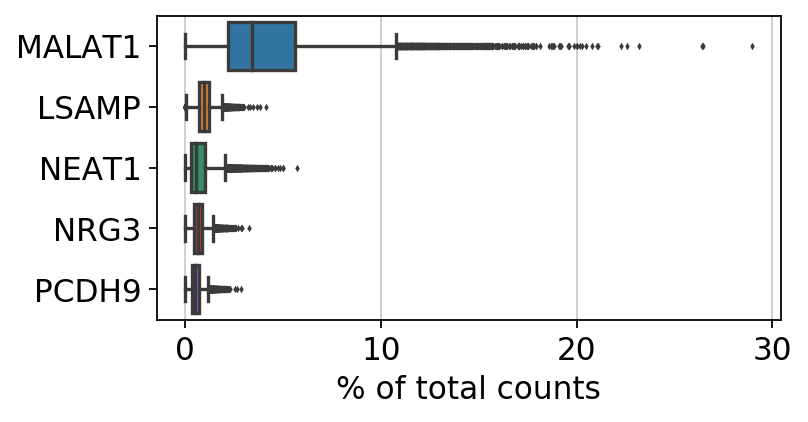

In [ ]:
#plot the highly expressed genes.
sc.pl.highest_expr_genes(adata, n_top=5, )

####**Basic filtering:**

Let's assemble some information about mitochondrial genes, which are important for quality control.

Citing from "Simple Single Cell" workflows [(Lun, McCarthy & Marioni, 2017)](https://master.bioconductor.org/packages/release/workflows/html/simpleSingleCell.html#examining-gene-level-metrics):

> High proportions are indicative of poor-quality cells (Islam et al. 2014; Ilicic et al. 2016), possibly because of loss of cytoplasmic RNA from perforated cells. The reasoning is that mitochondria are larger than individual transcript molecules and less likely to escape through tears in the cell membrane.

With `pp.calculate_qc_metrics`, we can compute many metrics very efficiently.

Generated some qc metrics plot.

In [ ]:
def annotate_mt_genes(adata):
  adata.var['mt'] = adata.var_names.str.startswith('MT-')  # annotate the group of mitochondrial genes as 'mt'
  sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

In [ ]:
def qc_metrics_plot(adata):
  '''
  This function plots the jointplot and histogram
  '''
  adata.var["mito"] = adata.var_names.str.startswith("MT-")
  sc.pp.calculate_qc_metrics(adata, qc_vars=["mito"], inplace=True)
  sns.jointplot(
      data=adata.obs,
      x="log1p_total_counts",
      y="log1p_n_genes_by_counts",
      kind="hex",
  )
  #sns.histplot(adata.obs["pct_counts_mito"])

In [ ]:
def violin_plot(adata):
    sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
                 jitter=0.4, multi_panel=True)

In [ ]:
def scatter_plot(adata):
    #sc.pl.scatter(adata, x='total_counts', y='pct_counts_mt')
    sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts')
    sc.pl.scatter(adata, x='n_genes_by_counts', y='pct_counts_mt')

In [ ]:
def filtering(adata, min_genes):
    adata.var_names_make_unique()
    sc.pp.filter_cells(adata,min_genes)  # Minimum number of genes expressed required for a cell to pass filtering.
    sc.pp.filter_genes(adata,min_cells=3)  # Minimum number of cells expressed required for a gene to pass filtering.
    adata.var['mt'] = adata.var_names.str.startswith('MT-')  # annotate the group of mitochondrial genes as 'mt'
    sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)
    sc.pl.highest_expr_genes(adata, n_top=5, )
    return adata

In [ ]:
def mito_genes_filter(adata, num_genes, pct_mt):
    '''this function filters out the unnecessary mt genes, keep at 2500 HVGs when wanted'''
    #normally, num_genes = 7000, pct_mt = 5
    adata = adata[adata.obs.n_genes_by_counts < num_genes, :]  # wants all the rows with number of counts <7000
    adata = adata[adata.obs.pct_counts_mt < pct_mt, :]  # also has to have mt<5
    return adata

In [ ]:
def normalize(adata):
    sc.pp.normalize_total(adata, target_sum=1e4)
    return adata

In [ ]:
def logarithmize(adata):
    sc.pp.log1p(adata)
    return adata

In [ ]:
def HVGs(adata):
    '''Find out the HVGs (without specific number of it) and store in the variable_genes parameter'''
    sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)
    adata.raw = adata
    return adata

In [ ]:
def HVGs_2500(adata):
    '''gives the 2500 most variable genes'''
    sc.pp.highly_variable_genes(adata, n_top_genes=2500, min_mean=0.0125, max_mean=3, min_disp=0.5)  # B
    adata.raw = adata
    return adata

In [ ]:
def plotHVGs(adata):
    sc.pl.highly_variable_genes(adata)

In [ ]:
def filter_by_HVGs(adata):
    adata = adata[:, adata.var.highly_variable]  # 2500 highly variable genes
    print("dimension check:" + str(adata))
    return adata

In [ ]:
def regress_out(adata):
    sc.pp.regress_out(adata, ['total_counts', 'pct_counts_mt'])
    return adata

In [ ]:
def scale(adata):
    #max_value defulat = 10
    sc.pp.scale(adata, max_value=10)
    return adata

In [ ]:
'''This is the only mandatory part'''
def PCA(adata, n_comps, filename):
    #set the number of PCs you want in n_comps
    sc.tl.pca(adata, n_comps, svd_solver='arpack')
    pca = pd.DataFrame(adata.obsm['X_pca']) #assign pca data into X_pca
    #adata = adata.uns['pca']
    print('here')
    print(pca)
    adata.obsm['X_pca'] = sc.AnnData(pca)
    print("pca check: " + str(adata.obs))
    adata.write(filename)
    return adata

####**Create Method 1 Object**

In [ ]:
m2_obj

NameError: ignored

before cell filter:  (26535, 12) (26535, 41625)
filtered out 10886 genes that are detected in less than 3 cells
normalizing counts per cell
    finished (0:00:01)


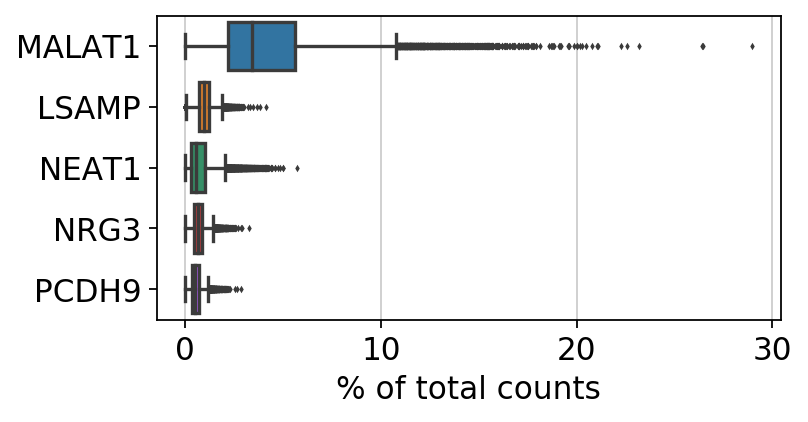

after cell filter:  (26535, 13) (26535, 30739)
after mito filter:  (25520, 13) (25520, 30739)


/usr/local/lib/python3.10/dist-packages/scanpy/preprocessing/_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


normalizing counts per cell
    finished (0:00:00)
size before HVGs: (25520, 30739)(25520, 13)
extracting highly variable genes
    finished (0:00:04)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)
size after HVGs: (25520, 30739)(25520, 13)
regressing out ['total_counts', 'pct_counts_mt']


In [ ]:
m2_obj = sc.read_h5ad("drive/MyDrive/scRNA ML classifier/data_objects_May_2022/new_anndata.h5ad")
m2_obj.var_names_make_unique()  # this is unnecessary if using `var_names='gene_ids'` in `sc.read_10x_mtx`

annotate_mt_genes(m2_obj)
# qc_metrics_plot(m2_obj)
# violin_plot(m2_obj)
# scatter_plot(m2_obj)
print("before cell filter: ", m2_obj.obs.shape, m2_obj.X.shape)
new = filtering(m2_obj, 600)
print("after cell filter: ", new.obs.shape, new.X.shape)
new = mito_genes_filter(new, 7000, 6)
print("after mito filter: ", new.obs.shape, new.X.shape)

new = normalize(new)
new = logarithmize(new)
print('size before HVGs: ' + str(new.X.shape) + str(new.obs.shape))
new = HVGs(new)
print('size after HVGs: '+ str( new.X.shape) +str(new.obs.shape))
#plotHVGs(new)
new = regress_out(new)
new = scale(new)
new = PCA(new, 50, PC_ALL)
obj = sc.AnnData(X=new.X.copy(),
                  obs=new.obs.copy(),
                  var=new.var.copy(),
                  uns=new.uns.copy(),
                  obsm=new.obsm.copy(),
                  varm=new.varm.copy(),
                  layers=new.layers.copy(),
                  #raw=new.raw.copy(),
                  dtype="float32",
                  shape=None,
                  # filename = NULL,
                  # filemode = NULL,
                  obsp=new.obsp.copy(),
                  varp=new.varp
                  )
# A random line that I found necessary for the object to work.
#obj.__dict__['_raw'].__dict__['_var'] = new.__dict__['_raw'].__dict__['_var'].rename(
    #columns={'_index': 'features'})
obj.write(PC_ALL)

####**Create Method 2 Object**

####**Create Method 3 Object**

In [ ]:
m1_obj = filtering(adata, 600)
m1_obj = mito_genes_filter(m1_obj, 7000, 5)
m1_obj = normalize(m1_obj)
m1_obj = logarithmize(m1_obj)
m1_obj = HVGs_2500(m1_obj)
m1_obj = filter_by_HVGs(m1_obj)
m1_obj = regress_out(m1_obj)
m1_obj = scale(m1_obj)
obj = sc.AnnData(X=m1_obj.X.copy(),
                  obs=m1_obj.obs.copy(),
                  var=m1_obj.var.copy(),
                  uns=m1_obj.uns.copy(),
                  obsm=m1_obj.obsm.copy(),
                  varm=m1_obj.varm.copy(),
                  layers=m1_obj.layers.copy(),
                  raw=m1_obj.raw.copy(),
                  dtype="float32",
                  shape=None,
                  # filename = NULL,
                  # filemode = NULL,
                  obsp=m1_obj.obsp.copy(),
                  varp=m1_obj.varp
                  )
obj.__dict__['_raw'].__dict__['_var'] = m1_obj.__dict__['_raw'].__dict__['_var'].rename(
    columns={'_index': 'features'})

In [ ]:
obj.write(HVGs)

##Old ones

Remove cells that have too many ***mitochondrial genes*** expressed or too many ***total counts***:

In [ ]:
sc.pl.scatter(adata, x='total_counts', y='pct_counts_mt')
sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts')
sc.pl.scatter(adata, x='n_genes_by_counts', y='pct_counts_mt')

In [ ]:
#qc params for DAN: min genes/cell = 1200, cutoff a 12500, pect mito - 2

In [ ]:
#qc params for MG: min genes/cell = 666, cutoff a 5000, pect mito - 6

Actually do the filtering by slicing the `AnnData` object.

In [ ]:
adata

In [ ]:
sc.pp.filter_cells(adata, min_genes=600) #Minimum number of genes expressed required for a cell to pass filtering.
sc.pp.filter_genes(adata, min_cells=3) #Minimum number of cells expressed required for a gene to pass filtering.

In [ ]:
adata = adata[adata.obs.n_genes_by_counts < 7000, :] #eliminate cells with number of genes < 7000
adata = adata[adata.obs.pct_counts_mt < 5, :] #also has to have % mt genes < 6

In [ ]:
#Dimension check. It has even fewer features (n_obs × n_vars = 7491 × 30739).
adata

Total-count normalize (library-size correct) the data matrix $\mathbf{X}$ to 10,000 reads per cell, so that counts become comparable among cells.

In [ ]:
sc.pp.normalize_total(adata, target_sum=1e4)

Logarithmize the data:

In [ ]:
sc.pp.log1p(adata)

Identify highly-variable genes.

**Note** <div>
Select one to run: <div>
Option A: no n_top_genes assigned ` ->` use the 3799 highly variable genes for PCA. File stored as `pca_in_obsm` <div>
Option B: Cutoff at n_top_genes = 2500 ` ->` use the top 2500 highly variable genes for PCA. File stored as `pca_in_obsm_2500` <div>
Option C: Use all genes after observations filtering (7491 observations * 30739 genes) -> then take 50 PCs


In [ ]:
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5) #m1

In [ ]:
adata.uns['hvg']

In [ ]:
sc.pp.highly_variable_genes(adata, n_top_genes = 2500, min_mean=0.0125, max_mean=3, min_disp=0.5) #m2, m3: create a field in AnnData structure that holds the hvgs

Set the `.raw` attribute of the AnnData object to the normalized and logarithmized raw gene expression for later use in differential testing and visualizations of gene expression. This simply freezes the state of the AnnData object.

<div class="alert alert-info">

**Note**

You can get back an `AnnData` of the object in `.raw` by calling `.raw.to_adata()`.

</div>    

In [ ]:
adata.raw = adata

<div class="alert alert-info">

**Note**
    
If you don't proceed below with correcting the data with `sc.pp.regress_out` and scaling it via `sc.pp.scale`, you can also get away without using `.raw` at all.

The result of the previous highly-variable-genes detection is stored as an annotation in `.var.highly_variable` and auto-detected by PCA and hence, `sc.pp.neighbors` and subsequent manifold/graph tools. In that case, the step *actually do the filtering* below is unnecessary, too.

</div>

Actually do the filtering

In [ ]:
adata = adata[:, adata.var.highly_variable] #m2, m3

Regress out effects of total counts per cell and the percentage of mitochondrial genes expressed. Scale the data to unit variance.

In [ ]:
sc.pp.regress_out(adata, ['total_counts', 'pct_counts_mt'])

In [ ]:
adata.obs.total_counts #check that the total counts are normalized & regressed

Scale each gene to unit variance. Clip values exceeding standard deviation 10.

In [ ]:
sc.pp.scale(adata, max_value=10)

In [ ]:
adata.X #check the X matrix to see if they have unit variance

**Note** <div>
Stop here if you do not want to proceed to PCA. <div>
*since PCA will not give you direct features*

In [ ]:
adata.write(no_pca)

## Principal component analysis

Reduce the dimensionality of the data by running principal component analysis (PCA), which reveals the top 50 axes of variation and denoises the data. The results of will be saved in `adata.obs['X_pca']`

In [ ]:
sc.tl.pca(adata, n_comps = 50, svd_solver='arpack')

In [ ]:
pca = pd.DataFrame(adata.obsm['X_pca'])

In [ ]:
pca

In [ ]:
o = adata.uns['pca']

In [ ]:
import sys

In [ ]:
print(sys.getsizeof(o))
print(len(o))
print(o)

In [ ]:
adata.varm['PCs'].shape

In [ ]:
adata.obsm['X_pca'].shape

In [ ]:
adata.var['features'].shape

In [ ]:
pcadata = sc.AnnData(pca)
print(pca)

In [ ]:
# Create a file to store the processed data. This script will run PCA on adata.X, and store the result in adata.obsm.
PC_all_gene_colab = 'write/PC_all_gene_colab.h5ad'
PC_2500HVGs_colab = 'write/PC_2500HVGs_colab.h5ad'
no_PC_2500HVGS_colab = 'write/no_PC_2500HVGS_colab.h5ad'

In [ ]:
adata.write(PC_all_gene_colab) #A

In [ ]:
adata.obsm['X_pca'].shape

In [ ]:
# Create a file to store the processed data. This script will run PCA on adata.X of top 2500 genes, and store the result in adata.obsm.
pca_in_obsm_2500 = 'write/pca_in_obsm_2500.h5ad'

In [ ]:
pca_from_30739_genes = 'write/pca_from_30739_genes.h5ad'

In [ ]:
pcadata.write(pca_from_30739_genes) #writing the pcadata array into file

In [ ]:
adata.obsm['X_pca']

We can make a scatter plot in the PCA coordinates, but we will not use that later on.

In [ ]:
sc.pl.pca(adata, color='CST3')

Let us inspect the contribution of single PCs to the total variance in the data. This gives us information about how many PCs we should consider in order to compute the neighborhood relations of cells, e.g. used in the clustering function  `sc.tl.louvain()` or tSNE `sc.tl.tsne()`. In our experience, often a rough estimate of the number of PCs does fine.

In [ ]:
sc.pl.pca_variance_ratio(adata, log=True)

Save the result.

In [ ]:
adata.write(pca_in_obsm) #A

In [ ]:
adata.write(pca_in_obsm_2500) #B

In [ ]:
adata.write(pca_from_30739_genes) #C

In [ ]:
adata

In [ ]:
adata.varm['PCs'].shape

In [ ]:
!git push origin master